In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [37]:
data = pd.read_csv('../Downloads/m5-forecasting-accuracy/sales_train_validation.csv')
calendar = pd.read_csv('../Downloads/m5-forecasting-accuracy/calendar.csv')
sell_prices = pd.read_csv('../Downloads/m5-forecasting-accuracy/sell_prices.csv')

## Calendar research

In [38]:
date = calendar

In [41]:
date.tail()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0
1968,2016-06-19,11621,Sunday,2,6,2016,d_1969,NBAFinalsEnd,Sporting,Father's day,Cultural,0,0,0


In [51]:
data[data.id=='HOBBIES_1_004_CA_1_validation']

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,...,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,1,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2


In [61]:
date.groupby('year').count()

,date,wm_yr_wk,weekday,wday,month,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
year,,,,,,,,,,,,,
2011,337,337,337,337,337,337,26,26,1,1,337,337,337
2012,366,366,366,366,366,366,30,30,0,0,366,366,366
2013,365,365,365,365,365,365,29,29,1,1,365,365,365
2014,365,365,365,365,365,365,28,28,2,2,365,365,365
2015,365,365,365,365,365,365,30,30,0,0,365,365,365
2016,171,171,171,171,171,171,19,19,1,1,171,171,171


In [72]:
date['event_name_1'].unique()

array([nan, 'SuperBowl', 'ValentinesDay', 'PresidentsDay', 'LentStart',
       'LentWeek2', 'StPatricksDay', 'Purim End', 'OrthodoxEaster',
       'Pesach End', 'Cinco De Mayo', "Mother's day", 'MemorialDay',
       'NBAFinalsStart', 'NBAFinalsEnd', "Father's day",
       'IndependenceDay', 'Ramadan starts', 'Eid al-Fitr', 'LaborDay',
       'ColumbusDay', 'Halloween', 'EidAlAdha', 'VeteransDay',
       'Thanksgiving', 'Christmas', 'Chanukah End', 'NewYear',
       'OrthodoxChristmas', 'MartinLutherKingDay', 'Easter'], dtype=object)

In [85]:
event_types = date.loc[date['year']==2012].groupby('event_type_1').count()['event_name_1']
event_types

event_type_1
Cultural      7
National     10
Religious    10
Sporting      3
Name: event_name_1, dtype: int64

In [87]:
date.loc[date['event_type_1']=='Cultural']['event_name_1'].unique()

array(['ValentinesDay', 'StPatricksDay', 'Cinco De Mayo', "Mother's day",
       "Father's day", 'Halloween', 'Easter'], dtype=object)

In [88]:
date.loc[date['event_type_1']=='National']['event_name_1'].unique()

array(['PresidentsDay', 'MemorialDay', 'IndependenceDay', 'LaborDay',
       'ColumbusDay', 'VeteransDay', 'Thanksgiving', 'Christmas',
       'NewYear', 'MartinLutherKingDay'], dtype=object)

In [89]:
date.loc[date['event_type_1']=='Religious']['event_name_1'].unique()

array(['LentStart', 'LentWeek2', 'Purim End', 'OrthodoxEaster',
       'Pesach End', 'Ramadan starts', 'Eid al-Fitr', 'EidAlAdha',
       'Chanukah End', 'OrthodoxChristmas'], dtype=object)

In [90]:
date.loc[date['event_type_1']=='Sporting']['event_name_1'].unique()

array(['SuperBowl', 'NBAFinalsStart', 'NBAFinalsEnd'], dtype=object)

## Sales Data research

In [114]:
data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [228]:
date.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [229]:
data.groupby('cat_id').count()['id']

cat_id
FOODS        14370
HOBBIES       5650
HOUSEHOLD    10470
Name: id, dtype: int64

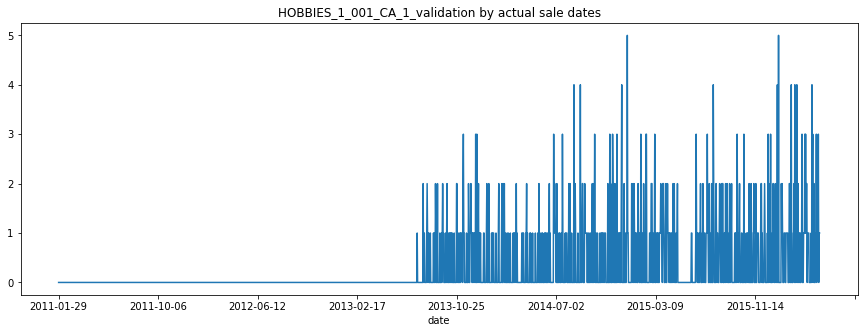

In [13]:
# Look as a specific item sales during the date

d_cols = [c for c in data.columns if 'd_' in c] # sales data columns

# Below we are chaining the following steps in pandas:
# 1. Select the item.
# 2. Set the id as the index,可有可无， Keep only sales data columns
# 3. Transform so it's a column
# 4. Plot the data
an_item_id='HOBBIES_1_001_CA_1_validation'
an_item = data.loc[data['id'] == an_item_id].set_index('id')[d_cols].T
#an_item = data.loc[data['id'] == an_item_id][d_cols].T
# an_item.plot(figsize=(15, 5), title= '{} by days'.format(an_item_id))
# #plt.xticks(date.date.tolist())
# plt.legend('')
# plt.show()
#此时的an_item是只有1 col的dataframe,而且col name是该行的#



# Merge an_item sales data with calendar dataset

an_item = an_item.reset_index().rename(columns={'index': 'd'})
an_item_dateSet = an_item.merge(date, how='left', validate='1:1')
an_item_dateSet.set_index('date').iloc[:,1].plot(figsize=(15, 5), title='{} by actual sale dates'.format(an_item_id))
plt.show()


#twenty_examples = data.sample(20, random_state=529).set_index('id')[d_cols].T.merge(date.set_index('d')['date'],
#           left_index=True, right_index=True, validate='1:1').set_index('date')

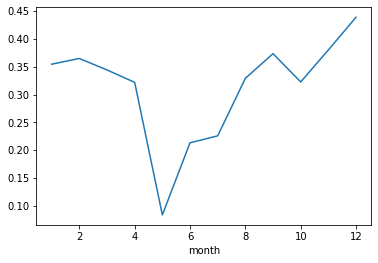

In [218]:
# an_item avg Sales group by Month/Year

an_item_dateSet.groupby('month').mean().iloc[:,0].plot()

In [242]:
date.set_index('d')['date']

d
d_1       2011-01-29
d_2       2011-01-30
d_3       2011-01-31
d_4       2011-02-01
d_5       2011-02-02
             ...    
d_1965    2016-06-15
d_1966    2016-06-16
d_1967    2016-06-17
d_1968    2016-06-18
d_1969    2016-06-19
Name: date, Length: 1969, dtype: object

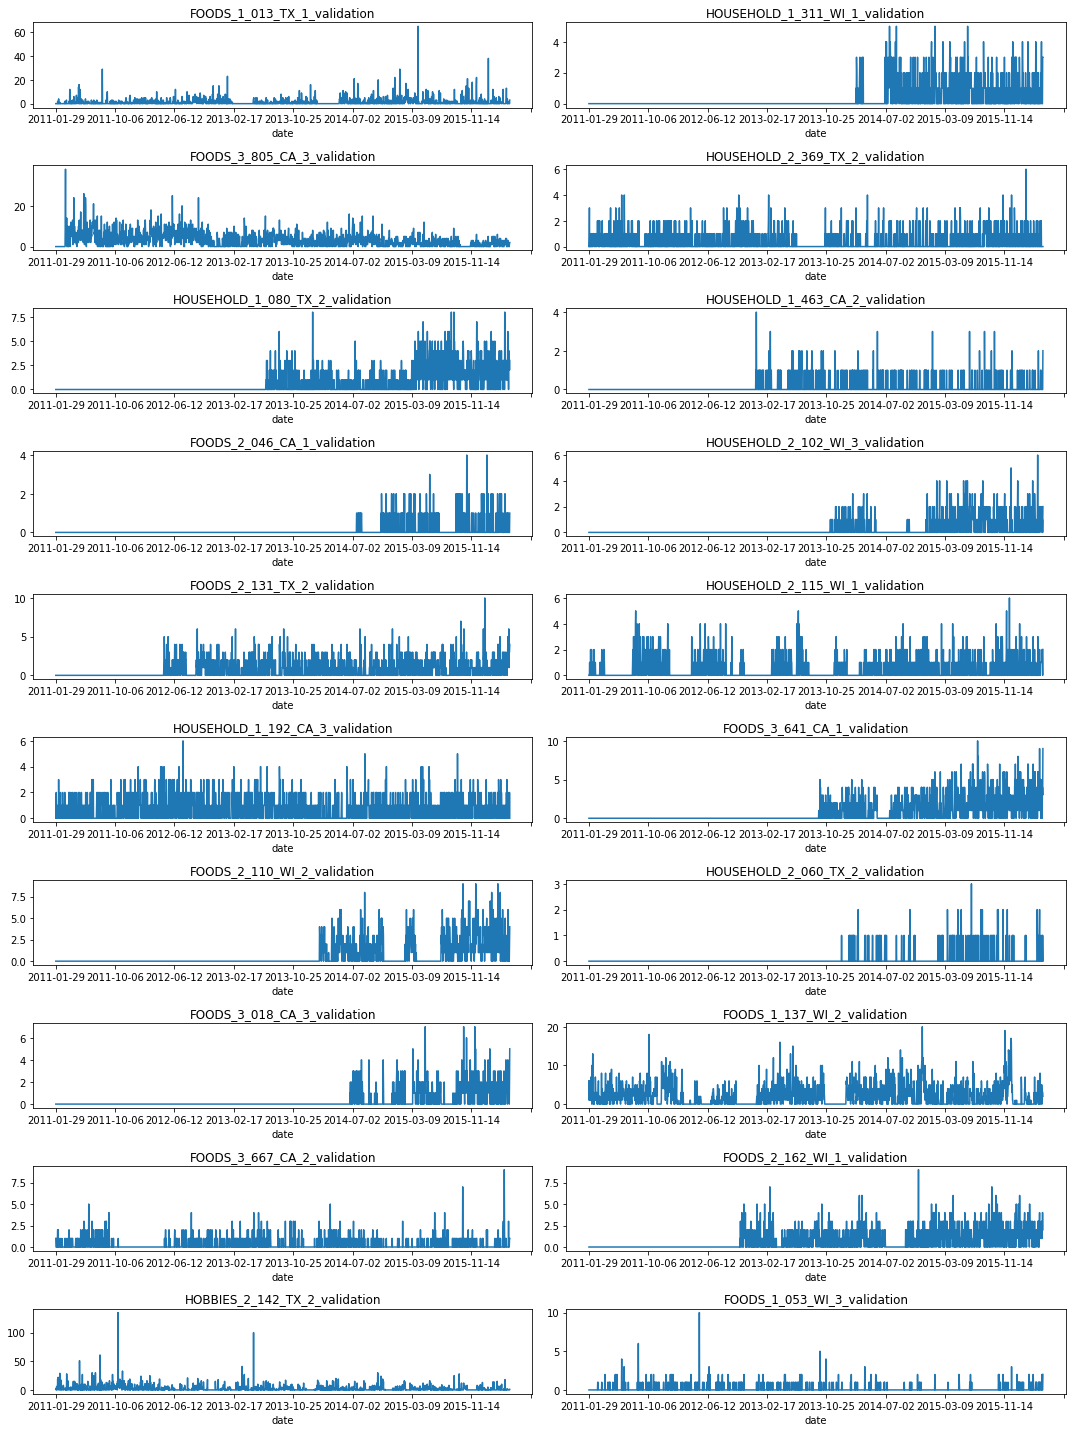

In [243]:
# Look at 20 different items

twenty_examples = data.sample(20, random_state=529).set_index('id')[d_cols].T.merge(date.set_index('d')['date'],
           left_index=True, right_index=True, validate='1:1').set_index('date')

fig, axs = plt.subplots(10, 2, figsize=(15, 20))
axs = axs.flatten()
ax_idx = 0
for item in twenty_examples.columns:
    twenty_examples[item].plot(title=item, ax=axs[ax_idx])
    ax_idx += 1
plt.tight_layout()
plt.show()

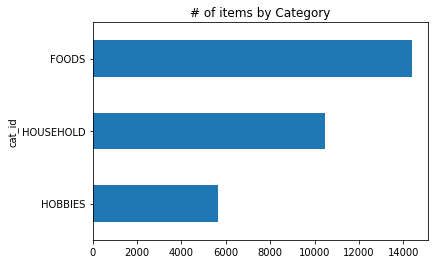

In [249]:
# Sales by type

data.groupby('cat_id').count()['id'].sort_values().plot(kind = 'barh', title = '# of items by Category')
plt.show()

In [278]:
data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


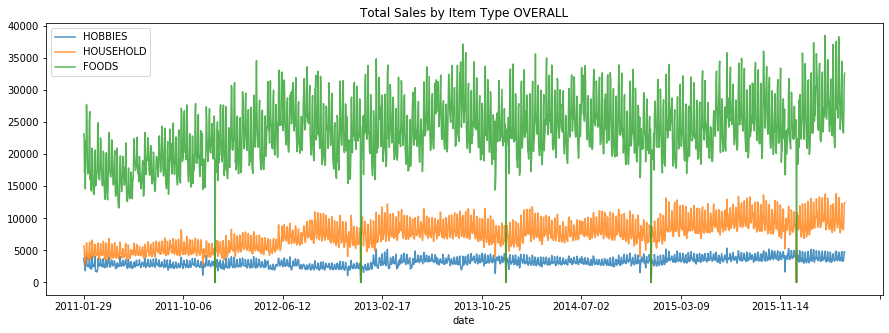

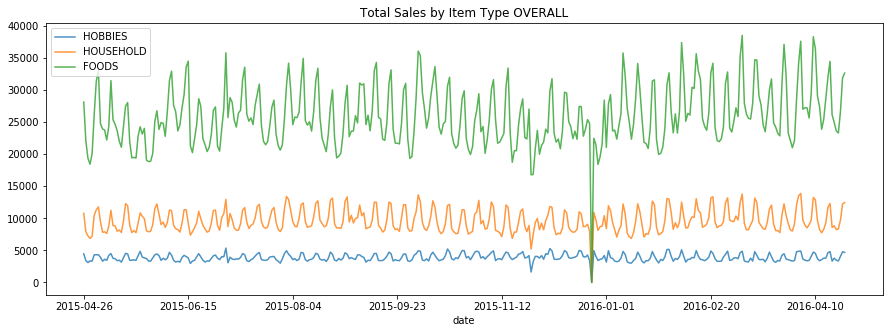

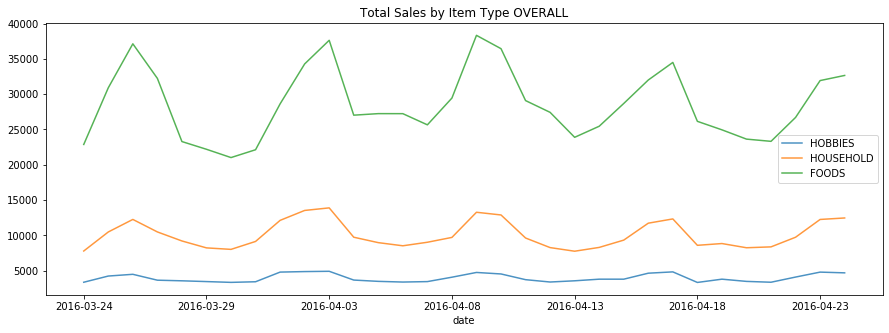

In [298]:
# cat_daily_sales = data.groupby('cat_id').sum()[d_cols]
# cat_daily_sales.plot(figsize=(15,8), title = 'Sales change by Categories')
# plt.xticks(date.date.T)


past_sales = data.set_index('id')[d_cols].T.merge(date.set_index('d')['date'],
           left_index=True, right_index=True, validate='1:1').set_index('date')

past_sales_1year=past_sales.iloc[-365:] 
past_sales_1month = past_sales_1year.iloc[-32:] 
#由于overall的看不清，看1yr的，发现有一天('2015-12-24')是关门的，所有销售为0
#看每月得到每周是一个cycle
# past_sales_
# items_col=[c for c in past_sales.columns if 'HOBBIES' in c ] #只选出hobbies
# past_sales[items_col] #axis=1是横向加


for i in data['cat_id'].unique():
    items_col = [c for c in past_sales.columns if i in c] #有if i in c才会遍历三个cat
    past_sales[items_col].sum(axis=1).plot(figsize=(15, 5), alpha=0.8, title='Total Sales by Item Type OVERALL')
plt.legend(data['cat_id'].unique())
plt.show()

# #有一些anomalies

for i in data['cat_id'].unique():
    items_col = [c for c in past_sales_1year.columns if i in c] 
    past_sales_1year[items_col].sum(axis=1).plot(figsize=(15, 5), alpha=0.8, title='Total Sales by Item Type OVERALL')
plt.legend(data['cat_id'].unique())
plt.show()

for i in data['cat_id'].unique():
    items_col = [c for c in past_sales_1month.columns if i in c] 
    past_sales_1month[items_col].sum(axis=1).plot(figsize=(15, 5), alpha=0.8, title='Total Sales by Item Type OVERALL')
plt.legend(data['cat_id'].unique())
plt.show()

In [ ]:
for i in data['cat_id'].unique():
    items_col = [c for c in past_sales_1year.columns if i in c] 
    past_sales_1year[items_col].sum(axis=1).plot(figsize=(15, 5), alpha=0.8, title='Total Sales by Item Type OVERALL')
plt.legend(data['cat_id'].unique())
plt.show()



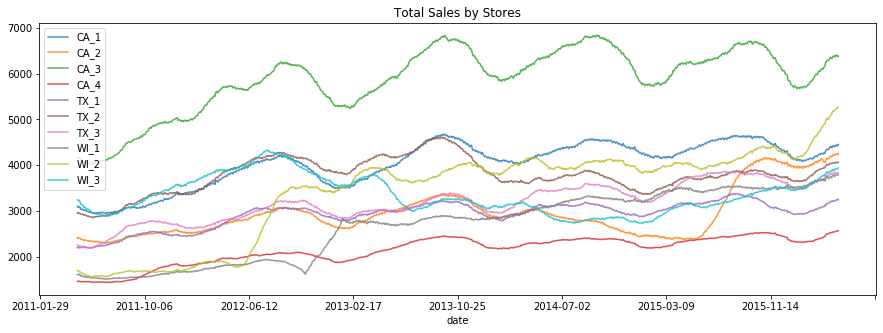

In [271]:
# Sales by stores


for i in data['store_id'].unique():
    items_col = [c for c in past_sales.columns if i in c] #有if i in c才会遍历三个cat
    past_sales[items_col].sum(axis=1).rolling(90).mean().plot(figsize=(15, 5), alpha=0.8, title='Total Sales by Stores')
    #平均数，不然会很乱
plt.legend(data['store_id'].unique())
plt.show()

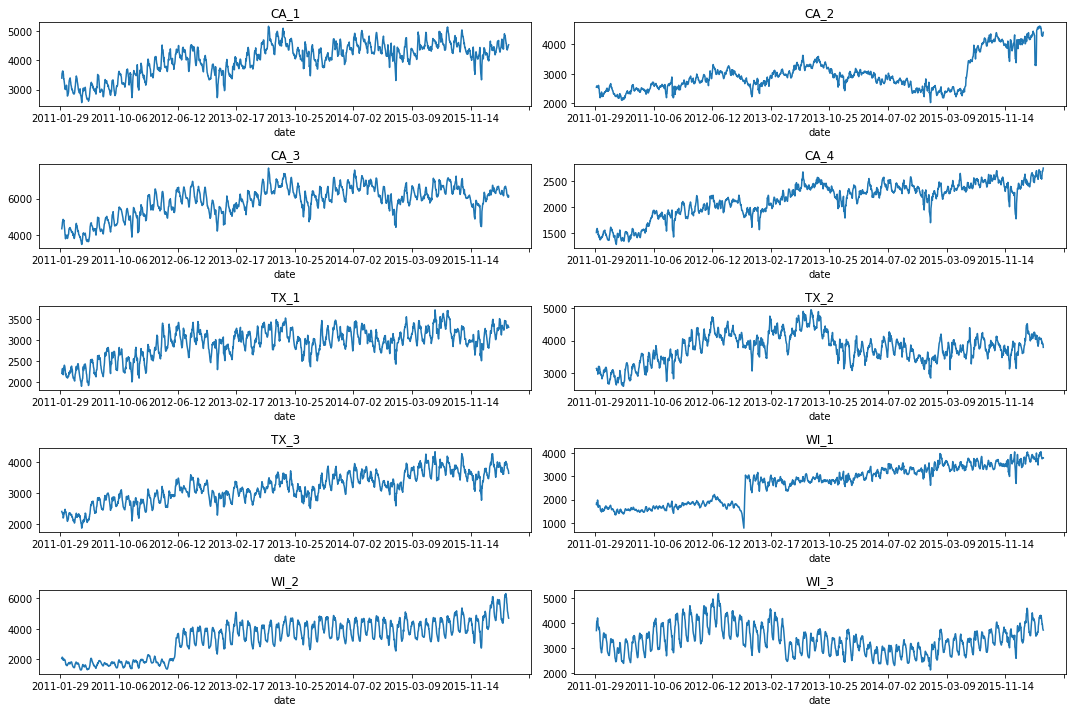

In [273]:
# Weekly sales trend by stores

fig, axs = plt.subplots(5, 2, figsize=(15, 10))
axs = axs.flatten()
ax_idx = 0

for i in data['store_id'].unique():
    items_col = [c for c in past_sales.columns if i in c] #有if i in c才会遍历三个cat
    past_sales[items_col].sum(axis=1).rolling(7).mean().plot(title=i, ax=axs[ax_idx])
    ax_idx += 1 #!!
plt.tight_layout()
plt.show()
#每家店的sales patten不同

## Modeling

In [14]:
train_set = data[d_cols[-100:-30]] #取day的最后70天，for all items
test_set = data[d_cols[-30:]]
train_set

,d_1814,d_1815,d_1816,d_1817,d_1818,d_1819,d_1820,d_1821,d_1822,d_1823,...,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883
0,0,0,0,2,1,2,1,0,0,0,...,1,1,3,1,3,1,2,2,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,3,2,4,3,1,2,3,0,8,2,...,1,3,4,2,1,4,1,3,5,0
4,0,1,0,0,0,1,0,0,3,0,...,1,0,3,2,2,2,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,0,0,0,0,1,0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
30486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30487,3,1,0,2,0,0,0,1,1,0,...,1,1,2,0,0,2,0,0,0,2
30488,0,4,4,2,2,1,1,2,0,1,...,1,1,1,1,1,1,0,2,1,1


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

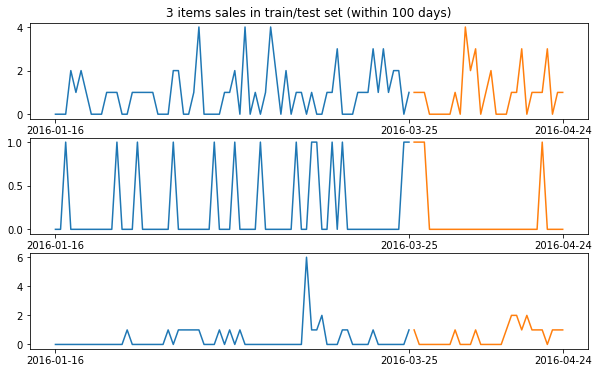

In [50]:
# three_examples_train = train_set.sample(3, random_state=420).T.merge(date.set_index('d')['date'],
#            left_index=True, right_index=True, validate='1:1').set_index('date')

# three_examples_test = test_set.sample(3, random_state=420).T.merge(date.set_index('d')['date'],
#            left_index=True, right_index=True, validate='1:1').set_index('date')

three_examples_train = train_set[:3].T.merge(date.set_index('d')['date'],
           left_index=True, right_index=True, validate='1:1').set_index('date')

three_examples_test = test_set[:3].T.merge(date.set_index('d')['date'],
           left_index=True, right_index=True, validate='1:1').set_index('date')

plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.plot(three_examples_train.iloc[:,0])
plt.plot(three_examples_test.iloc[:,0])
plt.xticks([0,69,99])
plt.title('3 items sales in train/test set (within 100 days)')

plt.subplot(3,1,2)
plt.plot(three_examples_train.iloc[:,1])
plt.plot(three_examples_test.iloc[:,1])
plt.xticks([0,69,99])

plt.subplot(3,1,3)
plt.plot(three_examples_train.iloc[:,2])
plt.plot(three_examples_test.iloc[:,2])
plt.xticks([0,69,99])

plt.show()

In [ ]:
# predictions = []
# for i in range(len(val_dataset.columns)):
#     if i == 0:
#         predictions.append(train_set[train_set.columns[-1]].values)
#     else:
#         predictions.append(test_set[test_set.columns[i-1]].values)
    
# predictions = np.transpose(np.array([row.tolist() for row in predictions]))
# error_naive = np.linalg.norm(predictions[:3] - val_dataset.values[:3])/len(predictions[0])

In [6]:
from sklearn.utils import shuffle
from tqdm.notebook import tqdm as tqdm

import pywt
from statsmodels.robust import mad

import scipy
import statsmodels
from scipy import signal
import statsmodels.api as sm
from scipy.signal import butter, deconvolve
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

import warnings
warnings.filterwarnings("ignore")

In [344]:
predictions = []
for row in tqdm(train_set[train_set.columns[-30:]].values[:3]):
    fit = sm.tsa.statespace.SARIMAX(row, seasonal_order=(0, 1, 1, 7)).fit()
    predictions.append(fit.forecast(30))
predictions = np.array(predictions).reshape((-1, 30))
error_arima = np.linalg.norm(predictions[:3] - test_set.values[:3])/len(predictions[0])

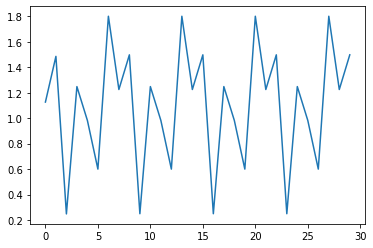

In [350]:
plt.plot(predictions[0])

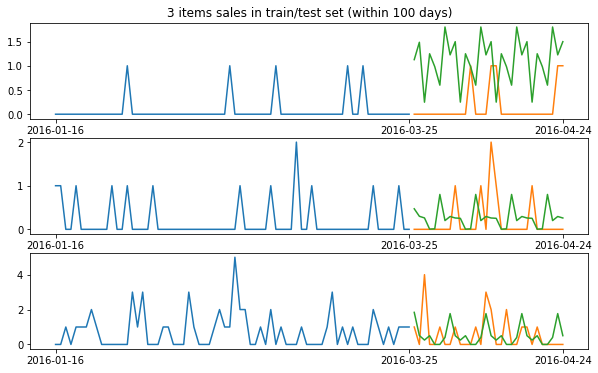

In [354]:
three_examples_train = train_set.sample(3, random_state=420).T.merge(date.set_index('d')['date'],
           left_index=True, right_index=True, validate='1:1').set_index('date')

three_examples_test = test_set.sample(3, random_state=420).T.merge(date.set_index('d')['date'],
           left_index=True, right_index=True, validate='1:1').set_index('date')


plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.plot(three_examples_train.iloc[:,0])
plt.plot(three_examples_test.iloc[:,0])
plt.plot(np.arange(70,100),predictions[0])
plt.xticks([0,69,99])
plt.title('3 items sales in train/test set (within 100 days)')

plt.subplot(3,1,2)
plt.plot(three_examples_train.iloc[:,1])
plt.plot(three_examples_test.iloc[:,1])
plt.plot(np.arange(70,100),predictions[1])
plt.xticks([0,69,99])

plt.subplot(3,1,3)
plt.plot(three_examples_train.iloc[:,2])
plt.plot(three_examples_test.iloc[:,2])
plt.plot(np.arange(70,100),predictions[2])
plt.xticks([0,69,99])

plt.show()

In [4]:
from fbprophet import Prophet

In [34]:
train_set[train_set.columns[-30:]].values[:3]

array([[0, 1, 4, 2, 0, 2, 0, 1, 1, 0, 1, 0, 0, 1, 1, 3, 0, 0, 0, 1, 1, 1,
        3, 1, 3, 1, 2, 2, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 1, 1, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1]])

In [43]:
df = train_set.T


# df = pd.DataFrame(np.transpose([dates, row]))
#df.columns = ["ds", "y"]
df

,0,1,2,3,4,5,6,7,8,9,...,30480,30481,30482,30483,30484,30485,30486,30487,30488,30489
d_1814,0,0,0,3,0,4,1,47,0,0,...,3,4,2,3,2,0,0,3,0,2
d_1815,0,0,0,2,1,0,0,5,0,0,...,1,5,2,2,2,0,0,1,4,2
d_1816,0,1,0,4,0,0,0,48,0,0,...,0,4,0,1,1,0,0,0,4,0
d_1817,2,0,0,3,0,0,0,4,0,0,...,3,1,1,0,2,0,0,2,2,1
d_1818,1,0,0,1,0,8,0,16,0,1,...,0,0,3,1,0,1,0,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_1879,1,0,0,4,2,0,1,2,0,0,...,2,3,1,0,4,0,0,2,1,2
d_1880,2,0,0,1,3,2,0,13,0,0,...,1,1,1,0,2,0,0,0,0,0
d_1881,2,0,0,3,1,0,0,10,0,0,...,2,4,1,0,2,0,0,0,2,5
d_1882,0,1,0,5,0,3,1,2,0,0,...,0,2,2,0,3,0,0,0,1,3


In [51]:
dates = ["2016-3-" + str(i) for i in range(1, 31)]
predictions = []
for row in tqdm(train_set[train_set.columns[-30:]].values[:3]): #columns[-30] means the last 30 days, values[:3]first 3 rows-items
    df = pd.DataFrame(np.transpose([dates, row]))
    df.columns = ["ds", "y"]
    model = Prophet(daily_seasonality=True)
    model.fit(df)
    future = model.make_future_dataframe(periods=30)
    forecast = model.predict(future)["yhat"].loc[30:].values
    predictions.append(forecast)
predictions = np.array(predictions).reshape((-1, 30))
error_prophet = np.linalg.norm(predictions[:3] - test_set.values[:3])/len(predictions[0])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 23.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 23.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 23.


In [52]:
dates = ["2016-3-" + str(i) for i in range(1, 31)]
predictions = []
for row in tqdm(train_set[train_set.columns[-30:]].values[:3]): #columns[-30] means the last 30 days, values[:3]first 3 rows-items
    df = pd.DataFrame(np.transpose([dates, row]))
    df.columns = ["ds", "y"]
    model = Prophet(daily_seasonality=True)
    model.fit(df)
    future = model.make_future_dataframe(periods=30)
    forecast = model.predict(future)["yhat"].loc[30:].values
    predictions.append(forecast)
predictions = np.array(predictions).reshape((-1, 30))
error_prophet = np.linalg.norm(predictions[:3] - test_set.values[:3])/len(predictions[0])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 23.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 23.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 23.


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

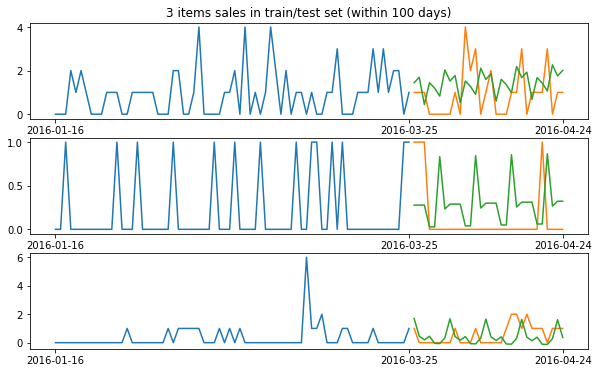

In [53]:
three_examples_train = train_set[:3].T.merge(date.set_index('d')['date'],
           left_index=True, right_index=True, validate='1:1').set_index('date')

three_examples_test = test_set[:3].T.merge(date.set_index('d')['date'],
           left_index=True, right_index=True, validate='1:1').set_index('date')


plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.plot(three_examples_train.iloc[:,0])
plt.plot(three_examples_test.iloc[:,0])
plt.plot(np.arange(70,100),predictions[0])
plt.xticks([0,69,99])
plt.title('3 items sales in train/test set (within 100 days)')

plt.subplot(3,1,2)
plt.plot(three_examples_train.iloc[:,1])
plt.plot(three_examples_test.iloc[:,1])
plt.plot(np.arange(70,100),predictions[1])
plt.xticks([0,69,99])

plt.subplot(3,1,3)
plt.plot(three_examples_train.iloc[:,2])
plt.plot(three_examples_test.iloc[:,2])
plt.plot(np.arange(70,100),predictions[2])
plt.xticks([0,69,99])

plt.show()

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import dask.dataframe as dd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import matplotlib.pyplot as plt
import seaborn as sns
#import lightgbm as lgb
#import dask_xgboost as xgb
import dask.dataframe as dd
from sklearn import preprocessing, metrics
import gc
import os
for dirname, _, filenames in os.walk('/Downloads/m5-forecasting-accuracy'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df


# function to read the data and merge it (ignoring some columns, this is a very fst model)


def read_data():
    print('Reading files...')
    calendar = pd.read_csv('../Downloads/m5-forecasting-accuracy/calendar.csv')
    calendar = reduce_mem_usage(calendar)
    print('Calendar has {} rows and {} columns'.format(calendar.shape[0], calendar.shape[1]))
    sell_prices = pd.read_csv('../Downloads/m5-forecasting-accuracy/sell_prices.csv')
    sell_prices = reduce_mem_usage(sell_prices)
    print('Sell prices has {} rows and {} columns'.format(sell_prices.shape[0], sell_prices.shape[1]))
    sales_train_validation = pd.read_csv('../Downloads/m5-forecasting-accuracy/sales_train_validation.csv')
    print('Sales train validation has {} rows and {} columns'.format(sales_train_validation.shape[0], sales_train_validation.shape[1]))
    submission = pd.read_csv('../Downloads/m5-forecasting-accuracy/sample_submission.csv')
    return calendar, sell_prices, sales_train_validation, submission


def melt_and_merge(calendar, sell_prices, sales_train_validation, submission, nrows = 55000000, merge = False):
    
    # melt sales data, get it ready for training
    sales_train_validation = pd.melt(sales_train_validation, id_vars = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], var_name = 'day', value_name = 'demand')
    print('Melted sales train validation has {} rows and {} columns'.format(sales_train_validation.shape[0], sales_train_validation.shape[1]))
    sales_train_validation = reduce_mem_usage(sales_train_validation)
    
    # seperate test dataframes
    test1_rows = [row for row in submission['id'] if 'validation' in row]
    test2_rows = [row for row in submission['id'] if 'evaluation' in row]
    test1 = submission[submission['id'].isin(test1_rows)]
    test2 = submission[submission['id'].isin(test2_rows)]
    
    # change column names
    test1.columns = ['id', 'd_1914', 'd_1915', 'd_1916', 'd_1917', 'd_1918', 'd_1919', 'd_1920', 'd_1921', 'd_1922', 'd_1923', 'd_1924', 'd_1925', 'd_1926', 'd_1927', 'd_1928', 'd_1929', 'd_1930', 'd_1931', 
                      'd_1932', 'd_1933', 'd_1934', 'd_1935', 'd_1936', 'd_1937', 'd_1938', 'd_1939', 'd_1940', 'd_1941']
    test2.columns = ['id', 'd_1942', 'd_1943', 'd_1944', 'd_1945', 'd_1946', 'd_1947', 'd_1948', 'd_1949', 'd_1950', 'd_1951', 'd_1952', 'd_1953', 'd_1954', 'd_1955', 'd_1956', 'd_1957', 'd_1958', 'd_1959', 
                      'd_1960', 'd_1961', 'd_1962', 'd_1963', 'd_1964', 'd_1965', 'd_1966', 'd_1967', 'd_1968', 'd_1969']
    
    # get product table
    product = sales_train_validation[['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']].drop_duplicates()
    
    # merge with product table
    test2['id'] = test2['id'].str.replace('_evaluation','_validation')
    test1 = test1.merge(product, how = 'left', on = 'id')
    test2 = test2.merge(product, how = 'left', on = 'id')
    test2['id'] = test2['id'].str.replace('_validation','_evaluation')
    
    # 
    test1 = pd.melt(test1, id_vars = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], var_name = 'day', value_name = 'demand')
    test2 = pd.melt(test2, id_vars = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], var_name = 'day', value_name = 'demand')
    
    sales_train_validation['part'] = 'train'
    test1['part'] = 'test1'
    test2['part'] = 'test2'
    
    data = pd.concat([sales_train_validation, test1, test2], axis = 0)
    
    del sales_train_validation, test1, test2
    
    # get only a sample for fst training
    data = data.loc[nrows:]
    
    # drop some calendar features
    calendar.drop(['weekday', 'wday', 'month', 'year'], inplace = True, axis = 1)
    
    # delete test2 for now
    data = data[data['part'] != 'test2']
    
    if merge:
        # notebook crash with the entire dataset (maybee use tensorflow, dask, pyspark xD)
        data = pd.merge(data, calendar, how = 'left', left_on = ['day'], right_on = ['d'])
        data.drop(['d', 'day'], inplace = True, axis = 1)
        # get the sell price data (this feature should be very important)
        data = data.merge(sell_prices, on = ['store_id', 'item_id', 'wm_yr_wk'], how = 'left')
        print('Our final dataset to train has {} rows and {} columns'.format(data.shape[0], data.shape[1]))
    else: 
        pass
    
    gc.collect()
    
    return data
        
calendar, sell_prices, sales_train_validation, submission = read_data()
data = melt_and_merge(calendar, sell_prices, sales_train_validation, submission, nrows = 27500000, merge = True)

Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Melted sales train validation has 58327370 rows and 8 columns
Mem. usage decreased to 3226.27 Mb (9.4% reduction)
Our final dataset to train has 31681090 rows and 18 columns


In [62]:
def transform(data):
    
    nan_features = ['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2']
    for feature in nan_features:
        data[feature].fillna('unknown', inplace = True)
        
    cat = ['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2']
    for feature in cat:
        encoder = preprocessing.LabelEncoder()
        data[feature] = encoder.fit_transform(data[feature])
    
    return data

def simple_fe(data):
    
    # rolling demand features
    data['lag_t28'] = data.groupby(['id'])['demand'].transform(lambda x: x.shift(28))
    data['lag_t29'] = data.groupby(['id'])['demand'].transform(lambda x: x.shift(29))
    data['lag_t30'] = data.groupby(['id'])['demand'].transform(lambda x: x.shift(30))
    data['rolling_mean_t7'] = data.groupby(['id'])['demand'].transform(lambda x: x.shift(28).rolling(7).mean())
    data['rolling_std_t7'] = data.groupby(['id'])['demand'].transform(lambda x: x.shift(28).rolling(7).std())
    data['rolling_mean_t30'] = data.groupby(['id'])['demand'].transform(lambda x: x.shift(28).rolling(30).mean())
    data['rolling_mean_t90'] = data.groupby(['id'])['demand'].transform(lambda x: x.shift(28).rolling(90).mean())
    data['rolling_mean_t180'] = data.groupby(['id'])['demand'].transform(lambda x: x.shift(28).rolling(180).mean())
    data['rolling_std_t30'] = data.groupby(['id'])['demand'].transform(lambda x: x.shift(28).rolling(30).std())
    data['rolling_skew_t30'] = data.groupby(['id'])['demand'].transform(lambda x: x.shift(28).rolling(30).skew())
    data['rolling_kurt_t30'] = data.groupby(['id'])['demand'].transform(lambda x: x.shift(28).rolling(30).kurt())
    
    
    # price features
    data['lag_price_t1'] = data.groupby(['id'])['sell_price'].transform(lambda x: x.shift(1))
    data['price_change_t1'] = (data['lag_price_t1'] - data['sell_price']) / (data['lag_price_t1'])
    data['rolling_price_max_t365'] = data.groupby(['id'])['sell_price'].transform(lambda x: x.shift(1).rolling(365).max())
    data['price_change_t365'] = (data['rolling_price_max_t365'] - data['sell_price']) / (data['rolling_price_max_t365'])
    data['rolling_price_std_t7'] = data.groupby(['id'])['sell_price'].transform(lambda x: x.rolling(7).std())
    data['rolling_price_std_t30'] = data.groupby(['id'])['sell_price'].transform(lambda x: x.rolling(30).std())
    data.drop(['rolling_price_max_t365', 'lag_price_t1'], inplace = True, axis = 1)
    
    # time features
    data['date'] = pd.to_datetime(data['date'])
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['week'] = data['date'].dt.week
    data['day'] = data['date'].dt.day
    data['dayofweek'] = data['date'].dt.dayofweek
    
    
    return data

def run_lgb(data):
    
    # going to evaluate with the last 28 days
    x_train = data[data['date'] <= '2016-03-27']
    y_train = x_train['demand']
    x_val = data[(data['date'] > '2016-03-27') & (data['date'] <= '2016-04-24')]
    y_val = x_val['demand']
    test = data[(data['date'] > '2016-04-24')]
    del data
    gc.collect()

    # define random hyperparammeters
    params = {
        'boosting_type': 'gbdt',
        'metric': 'rmse',
        'objective': 'regression',
        'n_jobs': -1,
        'seed': 236,
        'learning_rate': 0.1,
        'bagging_fraction': 0.75,
        'bagging_freq': 10, 
        'colsample_bytree': 0.75}

    train_set = lgb.Dataset(x_train[features], y_train)
    val_set = lgb.Dataset(x_val[features], y_val)
    
    del x_train, y_train

    model = lgb.train(params, train_set, num_boost_round = 2500, early_stopping_rounds = 50, valid_sets = [train_set, val_set], verbose_eval = 100)
    val_pred = model.predict(x_val[features])
    val_score = np.sqrt(metrics.mean_squared_error(val_pred, y_val))
    print(f'Our val rmse score is {val_score}')
    y_pred = model.predict(test[features])
    test['demand'] = y_pred
    return test

def predict(test, submission):
    predictions = test[['id', 'date', 'demand']]
    predictions = pd.pivot(predictions, index = 'id', columns = 'date', values = 'demand').reset_index()
    predictions.columns = ['id'] + ['F' + str(i + 1) for i in range(28)]

    evaluation_rows = [row for row in submission['id'] if 'evaluation' in row] 
    evaluation = submission[submission['id'].isin(evaluation_rows)]

    validation = submission[['id']].merge(predictions, on = 'id')
    final = pd.concat([validation, evaluation])
    final.to_csv('submission.csv', index = False)
    

# define list of features
features = ['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'year', 'month', 'week', 'day', 'dayofweek', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 
            'snap_CA', 'snap_TX', 'snap_WI', 'sell_price', 'lag_t28', 'lag_t29', 'lag_t30', 'rolling_mean_t7', 'rolling_std_t7', 'rolling_mean_t30', 'rolling_mean_t90', 
            'rolling_mean_t180', 'rolling_std_t30', 'price_change_t1', 'price_change_t365', 'rolling_price_std_t7', 'rolling_price_std_t30', 'rolling_skew_t30', 'rolling_kurt_t30']


def transform_train_and_eval(data):
    data = transform(data)
    data = simple_fe(data)
    # reduce memory for new features so we can train
    data = reduce_mem_usage(data)
    test = run_lgb(data)
    predict(test, submission)
    
transform_train_and_eval(data)

Mem. usage decreased to 2628.57 Mb (65.9% reduction)


NameError: name 'lgb' is not defined

In [1]:
##########################Load Libraries  ####################################
import pandas as pd
import numpy as np
import dask.dataframe as dd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn import preprocessing, metrics
from ipywidgets import widgets, interactive
import gc
import joblib
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, timedelta 
from typing import Union
from tqdm.notebook import tqdm_notebook as tqdm
from itertools import cycle
import datetime as dt
from torch.autograd import Variable
import random 
import os
from matplotlib.pyplot import figure
from fastprogress import master_bar, progress_bar
import torch
import torch.nn as nn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import time 
import torch.nn.functional as F
from torch.utils.data import Dataset
from sklearn.metrics import mean_squared_error
import torch 
from sklearn.model_selection import TimeSeriesSplit

from math import log
from math import exp
from scipy.stats import boxcox

 
import torch.optim as optim

%matplotlib inline

#from gensim.models import Word2Vec
#import gensim.downloader as api

pd.set_option('max_columns', 50)
plt.style.use('bmh')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])


ModuleNotFoundError: No module named 'lightgbm'

In [1]:
## https://www.kaggle.com/mikhailbulygin/mlip-team-wall-e-lgbm

In [2]:
from  datetime import datetime, timedelta
import gc
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.preprocessing import OrdinalEncoder
from tqdm.notebook import tqdm

import os, sys, gc, time, warnings, pickle, psutil, random
from math import ceil
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

In [3]:
# General imports
import numpy as np
import pandas as pd
import os, sys, gc, time, warnings, pickle, psutil, random

# custom imports
from multiprocessing import Pool        # Multiprocess Runs

warnings.filterwarnings('ignore')


In [4]:
# ## Multiprocess Runs
# def df_parallelize_run(func, t_split):
#     num_cores = np.min([N_CORES,len(t_split)])
#     pool = Pool(num_cores)
#     df = pd.concat(pool.map(func, t_split), axis=1)
#     pool.close()
#     pool.join()
#     return df

In [10]:

def seed_everything(seed=0):
    random.seed(seed)
    np.random.seed(seed)
    
def get_data_by_store(store):
    
    # Read and contact basic feature
    df = pd.concat([pd.read_pickle(BASE),
                    pd.read_pickle(PRICE).iloc[:,2:],
                    pd.read_pickle(CALENDAR).iloc[:,2:]],
                    axis=1)
    
    # Leave only relevant store
    df = df[df['store_id']==store]
    df2 = pd.read_pickle(MEAN_ENC)[mean_features]
    df2 = df2[df2.index.isin(df.index)]
    
    df3 = pd.read_pickle(LAGS).iloc[:,3:]
    df3 = df3[df3.index.isin(df.index)]
    
    df = pd.concat([df, df2], axis=1)
    del df2 # to not reach memory limit 
    
    df = pd.concat([df, df3], axis=1)
    del df3 # to not reach memory limit 
    
    # Create features list
    features = [col for col in list(df) if col not in remove_features]
    df = df[['id','d',TARGET]+features]
    
    # Skipping first n rows
    df = df[df['d']>=START_TRAIN].reset_index(drop=True)
    
    return df, features

# Recombine Test set after training
def get_base_test():
    base_test = pd.DataFrame()

    for store_id in STORES_IDS:
        temp_df = pd.read_pickle('test_'+store_id+'.pkl')
        temp_df['store_id'] = store_id
        base_test = pd.concat([base_test, temp_df]).reset_index(drop=True)
    
    return base_test


########################### Helper to make dynamic rolling lags
#################################################################################
def make_lag(LAG_DAY):
    lag_df = base_test[['id','d',TARGET]]
    col_name = 'sales_lag_'+str(LAG_DAY)
    lag_df[col_name] = lag_df.groupby(['id'])[TARGET].transform(lambda x: x.shift(LAG_DAY)).astype(np.float16)
    return lag_df[[col_name]]


def make_lag_roll(LAG_DAY):
    shift_day = LAG_DAY[0]
    roll_wind = LAG_DAY[1]
    lag_df = base_test[['id','d',TARGET]]
    col_name = 'rolling_mean_tmp_'+str(shift_day)+'_'+str(roll_wind)
    lag_df[col_name] = lag_df.groupby(['id'])[TARGET].transform(lambda x: x.shift(shift_day).rolling(roll_wind).mean())
    return lag_df[[col_name]]

In [8]:
import lightgbm as lgb
lgb_params = {
                    'boosting_type': 'gbdt',
                    'objective': 'tweedie',
                    'tweedie_variance_power': 1.1,
                    'metric': 'rmse',
                    'subsample': 0.5,
                    'subsample_freq': 1,
                    'learning_rate': 0.03,
                    'num_leaves': 2**11-1,
                    'min_data_in_leaf': 2**12-1,
                    'feature_fraction': 0.5,
                    'max_bin': 100,
                    'n_estimators': 1400,
                    'boost_from_average': False,
                    'verbose': -1,
                } 


In [12]:
########################### Vars
#################################################################################
VER = 1                          # Our model version
SEED = 42                        # We want all things
seed_everything(SEED)            # to be as deterministic 
lgb_params['seed'] = SEED        # as possible
N_CORES = psutil.cpu_count()     # Available CPU cores


#LIMITS and const
TARGET      = 'sales'            # Our target
START_TRAIN = 0                  # We can skip some rows (Nans/faster training)
END_TRAIN   = 1913               # End day of our train set
P_HORIZON   = 28                 # Prediction horizon
USE_AUX     = True               # Use or not pretrained models

#FEATURES to remove
## These features lead to overfit
## or values not present in test set
remove_features = ['id','state_id','store_id',
                   'date','wm_yr_wk','d',TARGET]
mean_features   = ['enc_cat_id_mean','enc_cat_id_std',
                   'enc_dept_id_mean','enc_dept_id_std',
                   'enc_item_id_mean','enc_item_id_std'] 

#PATHS for Features
ORIGINAL = '../Downloads/m5-forecasting-accuracy/'
BASE     = '../Downloads/m5-simple-fe/grid_part_1.pkl'
PRICE    = '../Downloads/m5-simple-fe/grid_part_2.pkl'
CALENDAR = '../Downloads/m5-simple-fe/grid_part_3.pkl'
LAGS     = '../Downloads/m5-lags-features/lags_df_28.pkl'
MEAN_ENC = '../Downloads/m5-custom-features/mean_encoding_df.pkl'


# AUX(pretrained) Models paths
AUX_MODELS = '../Downloads/m5-aux-models/'


#STORES ids
STORES_IDS = pd.read_csv(ORIGINAL+'sales_train_validation.csv')['store_id']
STORES_IDS = list(STORES_IDS.unique())


#SPLITS for lags creation
SHIFT_DAY  = 28
N_LAGS     = 15
LAGS_SPLIT = [col for col in range(SHIFT_DAY,SHIFT_DAY+N_LAGS)]
ROLS_SPLIT = []
for i in [1,7,14]:
    for j in [7,14,30,60]:
        ROLS_SPLIT.append([i,j])

In [19]:
pickle.load(BASE)

TypeError: a bytes-like object is required, not 'str'

In [13]:
########################### Train Models
#################################################################################
for store_id in STORES_IDS:
    print('Train', store_id)
    
    # Get grid for current store
    grid_df, features_columns = get_data_by_store(store_id)
    
    # Masks for 
    # Train (All data less than 1913)
    # "Validation" (Last 28 days - not real validatio set)
    # Test (All data greater than 1913 day, 
    #       with some gap for recursive features)
    train_mask = grid_df['d']<=END_TRAIN
    valid_mask = train_mask&(grid_df['d']>(END_TRAIN-P_HORIZON))
    preds_mask = grid_df['d']>(END_TRAIN-100)
    
    # Apply masks and save lgb dataset as bin
    # to reduce memory spikes during dtype convertations
    # https://github.com/Microsoft/LightGBM/issues/1032
    # "To avoid any conversions, you should always use np.float32"
    # or save to bin before start training
    # https://www.kaggle.com/c/talkingdata-adtracking-fraud-detection/discussion/53773
    train_data = lgb.Dataset(grid_df[train_mask][features_columns], 
                       label=grid_df[train_mask][TARGET])
    train_data.save_binary('train_data.bin')
    train_data = lgb.Dataset('train_data.bin')
    
    valid_data = lgb.Dataset(grid_df[valid_mask][features_columns], 
                       label=grid_df[valid_mask][TARGET])
    
    # Saving part of the dataset for later predictions
    # Removing features that we need to calculate recursively 
    grid_df = grid_df[preds_mask].reset_index(drop=True)
    keep_cols = [col for col in list(grid_df) if '_tmp_' not in col]
    grid_df = grid_df[keep_cols]
    grid_df.to_pickle('test_'+store_id+'.pkl')
    del grid_df
    
    # Launch seeder again to make lgb training 100% deterministic
    # with each "code line" np.random "evolves" 
    # so we need (may want) to "reset" it
    seed_everything(SEED)
    estimator = lgb.train(lgb_params,
                          train_data,
                          valid_sets = [valid_data],
                          verbose_eval = 100,
                          )
    
    # Save model - it's not real '.bin' but a pickle file
    # estimator = lgb.Booster(model_file='model.txt')
    # can only predict with the best iteration (or the saving iteration)
    # pickle.dump gives us more flexibility
    # like estimator.predict(TEST, num_iteration=100)
    # num_iteration - number of iteration want to predict with, 
    # NULL or <= 0 means use best iteration
    model_name = 'lgb_model_'+store_id+'_v'+str(VER)+'.bin'
    pickle.dump(estimator, open(model_name, 'wb'))

    # Remove temporary files and objects 
    # to free some hdd space and ram memory
    !rm train_data.bin
    del train_data, valid_data, estimator
    gc.collect()
    
    # "Keep" models features for predictions
    MODEL_FEATURES = features_columns

Train CA_1


FileNotFoundError: [Errno 2] No such file or directory: '../Downloads/m5-simple-fe/grid_part_1.pkl'

## Modeling
https://www.kaggle.com/kneroma/m5-first-public-notebook-under-0-50

In [2]:
from  datetime import datetime, timedelta
import gc
import numpy as np, pandas as pd
import lightgbm as lgb

In [3]:
CAL_DTYPES={"event_name_1": "category", "event_name_2": "category", "event_type_1": "category", 
         "event_type_2": "category", "weekday": "category", 'wm_yr_wk': 'int16', "wday": "int16",
        "month": "int16", "year": "int16", "snap_CA": "float32", 'snap_TX': 'float32', 'snap_WI': 'float32' }
PRICE_DTYPES = {"store_id": "category", "item_id": "category", "wm_yr_wk": "int16","sell_price":"float32" }

In [4]:
pd.options.display.max_columns = 50

In [5]:
h = 28 
max_lags = 57
tr_last = 1913
fday = datetime(2016,4, 25) #55 days away from 6/19/2016
fday

datetime.datetime(2016, 4, 25, 0, 0)

In [12]:
def create_dt(is_train = True, nrows = None, first_day = 1200): #把train/test set三张表melt, merge, and code
    prices = pd.read_csv("../Downloads/m5-forecasting-accuracy/sell_prices.csv", dtype = PRICE_DTYPES)
    for col, col_dtype in PRICE_DTYPES.items():
        if col_dtype == "category":
            prices[col] = prices[col].cat.codes.astype("int16")
            prices[col] -= prices[col].min()
            
    cal = pd.read_csv("../Downloads/m5-forecasting-accuracy/calendar.csv", dtype = CAL_DTYPES)
    cal["date"] = pd.to_datetime(cal["date"])
    for col, col_dtype in CAL_DTYPES.items():
        if col_dtype == "category":
            cal[col] = cal[col].cat.codes.astype("int16")
            cal[col] -= cal[col].min()
    
    start_day = max(1 if is_train  else tr_last-max_lags, first_day)
    numcols = [f"d_{day}" for day in range(start_day,tr_last+1)]
    catcols = ['id', 'item_id', 'dept_id','store_id', 'cat_id', 'state_id']
    dtype = {numcol:"float32" for numcol in numcols} 
    dtype.update({col: "category" for col in catcols if col != "id"})
    dt = pd.read_csv("../Downloads/m5-forecasting-accuracy/sales_train_validation.csv", 
                     nrows = nrows, usecols = catcols + numcols, dtype = dtype)
    print(dt.shape)
    for col in catcols:
        if col != "id":
            dt[col] = dt[col].cat.codes.astype("int16")
            dt[col] -= dt[col].min()
    
    if not is_train:
        for day in range(tr_last+1, tr_last+ 28 +1):
            dt[f"d_{day}"] = np.nan
    
    dt = pd.melt(dt,
                  id_vars = catcols,
                  value_vars = [col for col in dt.columns if col.startswith("d_")],
                  var_name = "d",
                  value_name = "sales")
    print(dt.shape)
    
    dt = dt.merge(cal, on= "d", copy = False)
    dt = dt.merge(prices, on = ["store_id", "item_id", "wm_yr_wk"], copy = False)
    print(dt.shape)
    
    return dt



In [48]:
# understanding.....

prices = pd.read_csv("../Downloads/m5-forecasting-accuracy/sell_prices.csv", dtype = PRICE_DTYPES) #用dict来定义dtypes
#print(prices.head())
for col, col_dtype in PRICE_DTYPES.items():
    if col_dtype == "category":
        prices[col] = prices[col].cat.codes.astype("int16") #把category的col编码
        #prices[col] -= prices[col].min() #return the alphabetically first entry from :Data, grouped by :Grouping
#print(prices.head())

cal = pd.read_csv("../Downloads/m5-forecasting-accuracy/calendar.csv", dtype = CAL_DTYPES)
cal["date"] = pd.to_datetime(cal["date"])
for col, col_dtype in CAL_DTYPES.items():
    if col_dtype == "category":
        cal[col] = cal[col].cat.codes.astype("int16")
        #cal[col] -= cal[col].min()
    
#start_day = max(1 if is_train  else tr_last-max_lags, first_day) #default first_day =1200, first_day=FIRST_DAY

numcols = [f"d_{day}" for day in range(1,1914)] #tr_last = 1913,对于trainSet：1~1913,对于testSet:first_day~last
catcols = ['id', 'item_id', 'dept_id','store_id', 'cat_id', 'state_id']
dtype = {numcol:"float32" for numcol in numcols} 
dtype.update({col: "category" for col in catcols if col != "id"})
dt = pd.read_csv("../Downloads/m5-forecasting-accuracy/sales_train_validation.csv", 
                    usecols = catcols + numcols, dtype = dtype) #此处的nrows=None,by default


for col in catcols:
    if col != "id":
        dt[col] = dt[col].cat.codes.astype("int16")
        #dt[col] -= dt[col].min()
    
# if not is_train: #if test set
#     for day in range(tr_last+1, tr_last+ 28 +1): #1914~1914+28
#         dt[f"d_{day}"] = np.nan
    
dt = pd.melt(dt, #unpivot a df from wide to long format
                id_vars = catcols, #use as id
                value_vars = [col for col in dt.columns if col.startswith("d_")], #other than id #当日的销量
                var_name = "d", #name of id
                value_name = "sales")
    
dt = dt.merge(cal, on= "d", copy = False)
dt = dt.merge(prices, on = ["store_id", "item_id", "wm_yr_wk"], copy = False)

dt.head()

#df = create_dt(is_train=True, first_day= FIRST_DAY)

NameError: name 'is_train' is not defined

In [46]:
prices.tail()

,store_id,item_id,wm_yr_wk,sell_price
6841116,9,3048,11617,1.0
6841117,9,3048,11618,1.0
6841118,9,3048,11619,1.0
6841119,9,3048,11620,1.0
6841120,9,3048,11621,1.0


In [7]:
def create_fea(dt):#增加rmean_7_7,rmean_7_28... and rename weekday to wday...
    lags = [7, 28]
    lag_cols = [f"lag_{lag}" for lag in lags ]
    for lag, lag_col in zip(lags, lag_cols):
        dt[lag_col] = dt[["id","sales"]].groupby("id")["sales"].shift(lag)

    wins = [7, 28]
    for win in wins :
        for lag,lag_col in zip(lags, lag_cols):
            dt[f"rmean_{lag}_{win}"] = dt[["id", lag_col]].groupby("id")[lag_col].transform(lambda x : x.rolling(win).mean())

    
    
    date_features = {
        
        "wday": "weekday",
        "week": "weekofyear",
        "month": "month",
        "quarter": "quarter",
        "year": "year",
        "mday": "day",
#         "ime": "is_month_end",
#         "ims": "is_month_start",
    }
    
#     dt.drop(["d", "wm_yr_wk", "weekday"], axis=1, inplace = True)
    
    for date_feat_name, date_feat_func in date_features.items():
        if date_feat_name in dt.columns:
            dt[date_feat_name] = dt[date_feat_name].astype("int16")
        else:
            dt[date_feat_name] = getattr(dt["date"].dt, date_feat_func).astype("int16")
            

In [13]:
FIRST_DAY = 350 # If you want to load all the data set it to '1' -->  Great  memory overflow  risk !

In [14]:
%%time

df = create_dt(is_train=True, first_day= FIRST_DAY)
df.shape

(30490, 1570)
(47686360, 8)
(40718219, 22)
CPU times: user 32 s, sys: 15 s, total: 47 s
Wall time: 51.5 s


(40718219, 22)

In [11]:
df.head()

,id,item_id,dept_id,store_id,cat_id,state_id,d,sales,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_002_CA_1_validation,1,0,0,0,0,d_350,0.0,2012-01-13,11150,0,7,1,2012,0,0,0,0,0.0,1.0,0.0,3.97
1,HOBBIES_1_004_CA_1_validation,3,0,0,0,0,d_350,2.0,2012-01-13,11150,0,7,1,2012,0,0,0,0,0.0,1.0,0.0,4.34
2,HOBBIES_1_005_CA_1_validation,4,0,0,0,0,d_350,0.0,2012-01-13,11150,0,7,1,2012,0,0,0,0,0.0,1.0,0.0,2.48
3,HOBBIES_1_008_CA_1_validation,7,0,0,0,0,d_350,0.0,2012-01-13,11150,0,7,1,2012,0,0,0,0,0.0,1.0,0.0,0.50
4,HOBBIES_1_009_CA_1_validation,8,0,0,0,0,d_350,2.0,2012-01-13,11150,0,7,1,2012,0,0,0,0,0.0,1.0,0.0,1.77


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40718219 entries, 0 to 40718218
Data columns (total 22 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            object        
 1   item_id       int16         
 2   dept_id       int16         
 3   store_id      int16         
 4   cat_id        int16         
 5   state_id      int16         
 6   d             object        
 7   sales         float32       
 8   date          datetime64[ns]
 9   wm_yr_wk      int16         
 10  weekday       int16         
 11  wday          int16         
 12  month         int16         
 13  year          int16         
 14  event_name_1  int16         
 15  event_type_1  int16         
 16  event_name_2  int16         
 17  event_type_2  int16         
 18  snap_CA       float32       
 19  snap_TX       float32       
 20  snap_WI       float32       
 21  sell_price    float32       
dtypes: datetime64[ns](1), float32(5), int16(14), object(2)
memory us

In [16]:
%%time

create_fea(df)
df.shape

CPU times: user 2min 59s, sys: 43.8 s, total: 3min 43s
Wall time: 4min 1s


(40718219, 31)

In [17]:
df.iloc[879:885]

,id,item_id,dept_id,store_id,cat_id,state_id,d,sales,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,lag_7,lag_28,rmean_7_7,rmean_28_7,rmean_7_28,rmean_28_28,week,quarter,mday
879,HOUSEHOLD_2_449_CA_1_validation,1980,3,0,1,0,d_350,0.0,2012-01-13,11150,0,7,1,2012,0,0,0,0,0.0,1.0,0.0,13.74,NaN,NaN,NaN,NaN,NaN,NaN,2,1,13
880,HOUSEHOLD_2_451_CA_1_validation,1982,3,0,1,0,d_350,0.0,2012-01-13,11150,0,7,1,2012,0,0,0,0,0.0,1.0,0.0,1.52,NaN,NaN,NaN,NaN,NaN,NaN,2,1,13
881,HOUSEHOLD_2_452_CA_1_validation,1983,3,0,1,0,d_350,0.0,2012-01-13,11150,0,7,1,2012,0,0,0,0,0.0,1.0,0.0,3.87,NaN,NaN,NaN,NaN,NaN,NaN,2,1,13
882,HOUSEHOLD_2_455_CA_1_validation,1986,3,0,1,0,d_350,0.0,2012-01-13,11150,0,7,1,2012,0,0,0,0,0.0,1.0,0.0,2.88,NaN,NaN,NaN,NaN,NaN,NaN,2,1,13
883,HOUSEHOLD_2_456_CA_1_validation,1987,3,0,1,0,d_350,0.0,2012-01-13,11150,0,7,1,2012,0,0,0,0,0.0,1.0,0.0,6.97,NaN,NaN,NaN,NaN,NaN,NaN,2,1,13
884,HOUSEHOLD_2_458_CA_1_validation,1989,3,0,1,0,d_350,0.0,2012-01-13,11150,0,7,1,2012,0,0,0,0,0.0,1.0,0.0,1.98,NaN,NaN,NaN,NaN,NaN,NaN,2,1,13


In [ ]:
#my understanding...
def create_fea(dt): #增加rmean_7_7,rmean_7_28... and rename weekday to wday...
    lags = [7, 28]
    lag_cols = [f"lag_{lag}" for lag in lags ]
    for lag, lag_col in zip(lags, lag_cols): #for lag, lag_col in {(7,'lag_7'), (28,'lag_28')} tuples
        dt[lag_col] = dt[["id","sales"]].groupby("id")["sales"].shift(lag) #每个id为一个group,把sales col shift lag days,前面的都是nan,增加了一栏lag_col=prev_value

    wins = [7, 28]
    for win in wins :
        for lag,lag_col in zip(lags, lag_cols):
            dt[f"rmean_{lag}_{win}"] = dt[["id", lag_col]].groupby("id")[lag_col].transform(lambda x : x.rolling(win).mean())

   
   
    for win in [7,28] :
        for lag,lag_col in {(7,'lag_7'), (28,'lag_28')}:
            dt[f"rmean_{lag}_{win}"] = dt[["id", lag_col]].groupby("id")[lag_col].transform(lambda x : x.rolling(win).mean())







    
    date_features = {
        
        "wday": "weekday",
        "week": "weekofyear",
        "month": "month",
        "quarter": "quarter",
        "year": "year",
        "mday": "day",
#         "ime": "is_month_end",
#         "ims": "is_month_start",
    }
    
#     dt.drop(["d", "wm_yr_wk", "weekday"], axis=1, inplace = True)
    
    for date_feat_name, date_feat_func in date_features.items():
        if date_feat_name in dt.columns:
            dt[date_feat_name] = dt[date_feat_name].astype("int16")
        else:
            dt[date_feat_name] = getattr(dt["date"].dt, date_feat_func).astype("int16") #getattr(object, name[, default]) same as object.name

In [18]:
df.dropna(inplace = True)
df.shape

(39041269, 31)

In [20]:
cat_feats = ['item_id', 'dept_id','store_id', 'cat_id', 'state_id'] + ["event_name_1", "event_name_2", "event_type_1", "event_type_2"]
useless_cols = ["id", "date", "sales","d", "wm_yr_wk", "weekday"]
train_cols = df.columns[~df.columns.isin(useless_cols)] #same as drop
X_train = df[train_cols]
y_train = df["sales"]

In [64]:
X_train.head()

,item_id,dept_id,store_id,cat_id,state_id,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,lag_7,lag_28,rmean_7_7,rmean_28_7,rmean_7_28,rmean_28_28,week,quarter,mday
869062,1,0,0,0,0,6,3,2012,24,3,0,0,1.0,0.0,1.0,3.97,0.0,0.0,0.000000,0.142857,0.214286,0.214286,10,1,8
869063,1,0,0,0,0,7,3,2012,0,0,0,0,1.0,1.0,1.0,3.97,0.0,1.0,0.000000,0.142857,0.178571,0.250000,10,1,9
869069,3,0,0,0,0,6,3,2012,24,3,0,0,1.0,0.0,1.0,4.34,3.0,2.0,1.857143,1.142857,1.392857,1.678571,10,1,8
869070,3,0,0,0,0,7,3,2012,0,0,0,0,1.0,1.0,1.0,4.34,1.0,0.0,2.000000,1.000000,1.392857,1.607143,10,1,9
869076,4,0,0,0,0,6,3,2012,24,3,0,0,1.0,0.0,1.0,2.98,0.0,0.0,0.000000,1.857143,0.750000,0.642857,10,1,8


In [21]:
%%time

np.random.seed(777)

fake_valid_inds = np.random.choice(X_train.index.values, 2000000, replace = False)
#np.random.choice(a:范围, size: 从a中选几个，replace,p:每个数的proba)
train_inds = np.setdiff1d(X_train.index.values, fake_valid_inds)
#numpy.setdiff1d(ar1, ar2, assume_unique=False)[source]：Find the set difference of two arrays.Return the unique values in ar1 that are not in ar2.
train_data = lgb.Dataset(X_train.loc[train_inds] , label = y_train.loc[train_inds], 
                         categorical_feature=cat_feats, free_raw_data=False)
fake_valid_data = lgb.Dataset(X_train.loc[fake_valid_inds], label = y_train.loc[fake_valid_inds],
                              categorical_feature=cat_feats,
                 free_raw_data=False)# This is a random sample, we're not gonna apply any time series train-test-split tricks here!

CPU times: user 23.2 s, sys: 17.4 s, total: 40.6 s
Wall time: 52.4 s


In [22]:
X_train.head()

,item_id,dept_id,store_id,cat_id,state_id,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,lag_7,lag_28,rmean_7_7,rmean_28_7,rmean_7_28,rmean_28_28,week,quarter,mday
869062,1,0,0,0,0,6,3,2012,24,3,0,0,1.0,0.0,1.0,3.97,0.0,0.0,0.000000,0.142857,0.214286,0.214286,10,1,8
869063,1,0,0,0,0,7,3,2012,0,0,0,0,1.0,1.0,1.0,3.97,0.0,1.0,0.000000,0.142857,0.178571,0.250000,10,1,9
869069,3,0,0,0,0,6,3,2012,24,3,0,0,1.0,0.0,1.0,4.34,3.0,2.0,1.857143,1.142857,1.392857,1.678571,10,1,8
869070,3,0,0,0,0,7,3,2012,0,0,0,0,1.0,1.0,1.0,4.34,1.0,0.0,2.000000,1.000000,1.392857,1.607143,10,1,9
869076,4,0,0,0,0,6,3,2012,24,3,0,0,1.0,0.0,1.0,2.98,0.0,0.0,0.000000,1.857143,0.750000,0.642857,10,1,8


In [23]:
del df, X_train, y_train, fake_valid_inds,train_inds ; gc.collect()

28

In [24]:
params = {
        "objective" : "poisson",
        "metric" :"rmse",
        "force_row_wise" : True,
        "learning_rate" : 0.075,
#         "sub_feature" : 0.8,
        "sub_row" : 0.75,
        "bagging_freq" : 1,
        "lambda_l2" : 0.1,
#         "nthread" : 4
        "metric": ["rmse"],
    'verbosity': 1,
    'num_iterations' : 1200,
    'num_leaves': 128,
    "min_data_in_leaf": 100,
}

In [25]:
%%time

m_lgb = lgb.train(params, train_data, valid_sets = [fake_valid_data], verbose_eval=20) 

/Users/maggiewu/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/maggiewu/anaconda3/lib/python3.7/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


KeyboardInterrupt: 

In [ ]:
m_lgb.save_model("model.lgb")

In [ ]:
%%time

alphas = [1.028, 1.023, 1.018]
weights = [1/len(alphas)]*len(alphas)
sub = 0.

for icount, (alpha, weight) in enumerate(zip(alphas, weights)):

    te = create_dt(False)
    cols = [f"F{i}" for i in range(1,29)]

    for tdelta in range(0, 28):
        day = fday + timedelta(days=tdelta)
        print(tdelta, day)
        tst = te[(te.date >= day - timedelta(days=max_lags)) & (te.date <= day)].copy()
        create_fea(tst)
        tst = tst.loc[tst.date == day , train_cols]
        te.loc[te.date == day, "sales"] = alpha*m_lgb.predict(tst) # magic multiplier by kyakovlev



    te_sub = te.loc[te.date >= fday, ["id", "sales"]].copy()
#     te_sub.loc[te.date >= fday+ timedelta(days=h), "id"] = te_sub.loc[te.date >= fday+timedelta(days=h), 
#                                                                           "id"].str.replace("validation$", "evaluation")
    te_sub["F"] = [f"F{rank}" for rank in te_sub.groupby("id")["id"].cumcount()+1]
    te_sub = te_sub.set_index(["id", "F" ]).unstack()["sales"][cols].reset_index()
    te_sub.fillna(0., inplace = True)
    te_sub.sort_values("id", inplace = True)
    te_sub.reset_index(drop=True, inplace = True)
    te_sub.to_csv(f"submission_{icount}.csv",index=False)
    if icount == 0 :
        sub = te_sub
        sub[cols] *= weight
    else:
        sub[cols] += te_sub[cols]*weight
    print(icount, alpha, weight)


sub2 = sub.copy()
sub2["id"] = sub2["id"].str.replace("validation$", "evaluation")
sub = pd.concat([sub, sub2], axis=0, sort=False)
sub.to_csv("submission.csv",index=False)

In [ ]:
sub.head(10)

In [ ]:
sub.id.nunique(), sub["id"].str.contains("validation$").sum()

In [ ]:
sub.shape